# Linear Regression(선형 회귀)이란?

***
* 머신 러닝에서 regression이라 함은 모델에 입력 값을 발생할 아웃풋을 예측하는 것이다.
* 결과값을 예측하는 간단한 방법중 하나는 선을 하나 긋는 것이다.


* 물론 주어진 데이터에 완벽하게 대응하는 선형 함수는 대부분의 경우에는 없다.
* 그래서 가장 오류(실제 데이터와 예측 데이터의 차이)를 줄이는 방향의 선을 찾는 것이 우리의 목표이고 이게 선형 회귀이다.
*****
### 일단 아래의 코드를 보면서 실제 모습을 보도록 하자

독립변수 X와 종속변수 Y를 아래와 같이 설정했다.

In [43]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np


In [44]:
X = np.array([2, 3, 4, 5, 6])
Y = np.array([4, 7, 6, 8, 10])

#### 여기서 X와 Y데이터를 1, 5가 아닌 5,1의 형태로 변경

In [45]:
trainX_value = np.array([[2, 3, 4, 5, 6]]).T
trainY_value = np.array([[4, 7, 6, 8, 10]]).T

In [46]:
trainX = pd.DataFrame(trainX_value, columns=['x'])
trainY = pd.DataFrame(trainY_value, columns=['y'])
testX = pd.DataFrame([[7]], columns=['x'])
testY = pd.DataFrame([[8]], columns=['y'])

print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(5, 1) (5, 1) (1, 1) (1, 1)


In [47]:
lr = LinearRegression()
lr_fit = lr.fit(trainX, trainY)
prediction = lr_fit.predict(testX)

In [48]:
print('예측 값 :', prediction)
print('기울기: ', lr_fit.coef_, 'y절편: ', lr_fit.intercept_)

예측 값 : [[10.9]]
기울기:  [[1.3]] y절편:  [1.8]


In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

* 여기서 파란 범위는 예측 범위를 뜻하는데 이 데이터들이 실제의 모든 값이 아닌 샘플이라서 그렇다.
* 즉, 참회귀선이 아닌 추정회귀선을 그린 것으로 그에 따른 예측 범위를 나타낸 것이다.

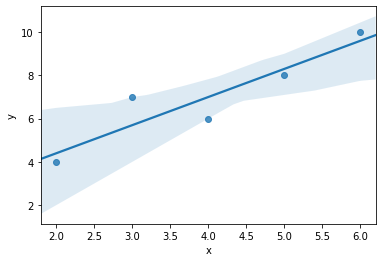

In [50]:
sns.regplot(x=trainX.x, y=trainY.y)
plt.show()

## 수학적 분석

***
### 조건
* 우선 단순 선형 회귀에서의 수식을 구해서 확장해나갈것이다.
* x가 독립변수, y가 종속 변수가 된다.
* x라는 데이터를 이용해서 우리가 원하는 직선을 y = b0 + b1x라고 가정한다.
* 오차를 구하는 방식은 오차제곱합(SSE)를 사용한다.

***
### 수식
1. SSE = Σ(실제 값 - 예측값)^2 = Σ(yi - b0 - b1xi)^2 
2. 이 식을 b0와 b1에 대해서 편미분을 한다.
3. 편미분 된 SSE를 0으로 놓고 정리를 하면 b0와 b1을 사용하는 두 개의 식이 남는다.
4. 정리하면 끝

***
### 실제로 식을 구해보기
위의 LinearRegression으로 만든 직선의 기울기와 절편을 구해보자


In [9]:
n, _ = trainX_value.shape
print('n은 독립변수 데이터의 갯수: ', n, '\n')

train_data = np.vstack([trainX_value.T, trainY_value.T])
Sxy = np.cov(train_data)  # 표본의 공분산 행렬이 나온다. 그 뜻은 자유도로 나눠진다는 것.
print('Sxy는 공분산의 행렬\n', Sxy, '\n')
Sxy = Sxy[0][1]

Sxx = np.var(trainX_value) # 모분산이다.
Sxx = (Sxx * n) / (n-1) # 표본의 분산으로 변환이다.
print('Sxx는 독립변수 x의 표본분산: ', Sxx, '\n')

b1 = Sxy / Sxx
print('b1은 기울기: ', b1, '\n')

y_mean = trainY_value.mean()
x_mean = trainX_value.mean()
b0 = y_mean - b1 * x_mean
print('b0는 y절편: ', b0)

n은 독립변수 데이터의 갯수:  5 

Sxy는 공분산의 행렬
 [[2.5  3.25]
 [3.25 5.  ]] 

Sxx는 독립변수 x의 표본분산:  2.5 

b1은 기울기:  1.3 

b0는 y절편:  1.7999999999999998



***
## 다중선형회귀 (multi linear regression)
그러면 실제로 다양한 변수를 갖는 다중선형회귀를 살펴봅니다.
* 식은 y = b0 + b1* x1 + b2 * x2 + b3* x3 + ...(계수의 수는 특징의 수)
* 가져온 데이터는 집값을 예측하기 위해서 여러 특징들이 있는 데이터
* 예측 데이터는 mse와 r2로 측정함.

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

train = pd.read_csv('train.csv')

trainY = train['SalePrice']
trainX = train.drop(['SalePrice', 'Id', 'Unnamed: 0'], axis=1)

trainX.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,8450,1,3,3,0,4,0,5,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,11250,1,0,3,0,4,0,5,...,42,0,0,0,0,0,9,2008,8,4
3,70,3,9550,1,0,3,0,0,0,6,...,35,272,0,0,0,0,2,2006,8,0
4,60,3,14260,1,0,3,0,2,0,15,...,84,0,0,0,0,0,12,2008,8,4


In [154]:
print('trainX, trainY의 크기:', trainX.shape, trainY.shape)

num_columns = [a for a in trainX.columns if trainX[a].dtypes != object]
print('trainX의 numeric type:', len(num_columns))
print('trainX의 가장 큰 null의 개수:', trainX.isnull().sum().max())

trainX, trainY의 크기: (1457, 61) (1457,)
trainX의 numeric type: 61
trainX의 가장 큰 null의 개수: 0


In [155]:
X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

(976, 61) (481, 61) (976,) (481,)


In [156]:
mse = mean_squared_error(prediction, y_test)
r2 = r2_score(prediction, y_test)

## mse
* 정답에 대한 오류를 나타내는 손실함수로 오답에 가까울수록 큰 값이 나온다.
* 평균 제공 오차로 (1/n) * Σ(예측값 - 실제값)^2 이다.
* 상대적인 오차표현 방식으로 값의 범위(크기)에 따라서 다르게 생각해야한다.


## R2 (결정계수)
* 회귀모형의 설명력을 표현할때 사용한다.
* r2 = SSR / SST = 1 - SSE / SST이다.


* SST(Sum of Square Total)
  * 편차의 제곱합이다. 
  *   Σ(실제값 - 실제값의 평균)^2


* SSE(Sum of Square Error)
  * 회귀식과 실제값의 차이 
  * Σ(예측값 - 실제값)^2

 
* SSR(Sum of Square Regression)
  * 회귀식과 평균값의 차이 
  * Σ(예측값 - 실제값의 평균)^2


In [159]:
print('mse:', mse)
print('r2:', r2)

mse: 0.018039484938215097
r2: 0.8772110127663418


In [160]:
print(lr.coef_)
print(len(lr.coef_))
print(lr.intercept_)

[-3.44970981e-05 -2.32785438e-02  2.46548629e-06  3.23877199e-01
 -7.16647042e-03 -5.43369032e-03 -1.08819736e-01 -2.87657880e-03
  5.42414399e-03 -1.08022698e-03  5.36780287e-03 -1.66142375e-02
 -9.81473358e-03  4.82702162e-04  6.42836227e-02  4.08697510e-02
  1.79110513e-03  4.97026765e-04  1.71894114e-03 -4.11217722e-03
 -5.00058390e-03  4.34942856e-03 -8.58467610e-03  1.17473980e-02
  1.11123924e-02  7.02476763e-05  4.92319740e-05 -1.75726662e-05
  1.01906984e-04 -8.53740977e-03 -1.12536377e-02  6.79102606e-02
  3.09684401e-03  1.36927873e-04  8.08693836e-05 -6.79527412e-05
  1.49844515e-04  2.05751828e-02 -7.92073748e-03  1.25968365e-02
  3.42880619e-03 -1.26801574e-02 -6.77991420e-02 -1.89781938e-02
  1.01378353e-02  2.14937836e-02  2.42105499e-02  5.25135342e-02
  4.34079909e-05  1.32432313e-02  9.34286267e-05  1.56812039e-04
  1.38665027e-04  1.58624655e-05  3.40353301e-04  2.19190343e-04
 -3.81344369e-07 -1.60040290e-03 -5.29293129e-03 -1.60035713e-03
  3.06372228e-02]
61
16.3